# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Kelly Bromley
[Project 7 - Applying Course Skills & Engage](https://github.com/K-Bromley/module_07_course_skills)


Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

## Import Dependencies and Check

In [30]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
from spacytextblob.spacytextblob import SpacyTextBlob

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.6.2.post1
appnope                   0.1.4
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.2.0
blis                      1.0.1
catalogue                 2.0.10
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.4.0
click                     8.1.7
cloudpathlib              0.20.0
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.1
cycler                    0.12.1
cymem                     2.0.10
debugpy                   1.8.9
decorator                 5.1.1
defusedxml                0.7.1
en_core_web_sm            3.8.0
executing

## Task 1
1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [31]:
# Fetching data from URL
response = requests.get("https://abcnews.go.com/US/toms-maine-toothpaste-made-bacteria-contaminated-water-fda/story?id=116024512")
contents = response.text

# Write contents to .pkl file
with open('abc_news_article.pkl', 'wb') as file:
    pickle.dump(contents, file)

## Task 2
2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [32]:
# Import BeautifulSoup
from bs4 import BeautifulSoup

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

#Load pkl file and parse HTML contents via BeautifulSoup
with open('abc_news_article.pkl', 'rb') as file:
    contents = pickle.load(file)

soup = BeautifulSoup(contents, 'html.parser')

article_text = soup.get_text(separator=' ', strip=True)

doc = nlp(article_text)
polarity = doc._.blob.polarity

print("The overall Article polarity score is", polarity)

if polarity > 0:
    sentiment = "positive"
elif polarity < 0:
    sentiment = "negative"
else:
    sentiment = "neutral"

print(f"The overall sentiment of the Article is {sentiment}.")

# Print the number of sentences in the article
num_sentences = len(list(doc.sents))
print(f"Number of Sentences in the Article: {num_sentences}")

The overall Article polarity score is 0.19555274971941639
The overall sentiment of the Article is positive.
Number of Sentences in the Article: 23


## Task 3
3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [33]:
nlp = spacy.load("en_core_web_sm")

# Article text from file
article = nlp(soup.get_text())

# Filtering out punctuation, stopwords, and whitespace as requested
tokens = [token.text.lower() for token in article if not token.is_punct and not token.is_stop and not token.is_space]

# 5 Common Tokens
token_freq = Counter(tokens).most_common(5)

# Print 5 Common tokens and frequencies
print("5 Common Tokens in the Article:")
for token, freq in token_freq:
    print(f"The token {token} has a frequency of {freq}")

5 Common Tokens in the Article:
The token water has a frequency of 10
The token fda has a frequency of 9
The token maine has a frequency of 8
The token toothpaste has a frequency of 8
The token tom has a frequency of 6


## Task 4
4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [34]:
# Get Lemmas and filter out punctuation, stopwords, and whitespace as requested.
lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Get the 5 most common lemmas
lemma_freq = Counter(lemmas).most_common(5)

# Print Lemmas with their Frequencies
print("5 Most Common Lemmas in the Article:")
for lemma, freq in lemma_freq:
    print(f"The lemma {lemma} has a frequency of {freq}")

5 Most Common Lemmas in the Article:
The lemma fda has a frequency of 11
The lemma water has a frequency of 10
The lemma tom has a frequency of 8
The lemma maine has a frequency of 8
The lemma toothpaste has a frequency of 8


## Task 5
5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

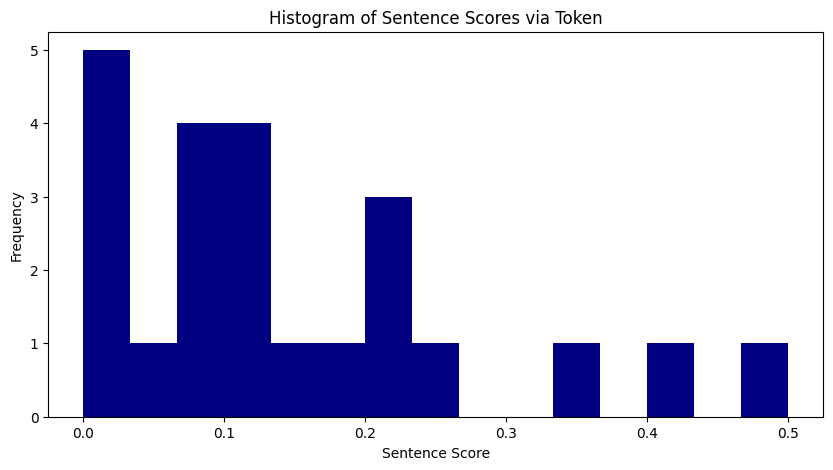

Min: 0.0
Max: 0.5
Number of Scores: 23


In [42]:
def score_sentence_by_token(sentence, interesting_tokens):
    # Get Interesting Token Count
    tokens = [token.text.lower() for token in nlp(sentence) if not token.is_punct and not token.is_stop and not token.is_space]
    interesting_count = sum(1 for token in tokens if token in interesting_tokens)
    score = interesting_count / len(tokens) if tokens else 0
    return score

interesting_tokens = [token for token, _ in token_freq]

# Create List of Token Sentence Scores
token_sentence_scores = [score_sentence_by_token(sentence.text, interesting_tokens) for sentence in doc.sents]

# Histogram of Sentence scores
plt.figure(figsize=(10, 5))
plt.hist(token_sentence_scores, bins=15, color='navy')
plt.title('Histogram of Sentence Scores via Token')
plt.xlabel('Sentence Score')
plt.ylabel('Frequency')
plt.show()

print(f"Min: {min(token_sentence_scores)}")
print(f"Max: {max(token_sentence_scores)}")
print(f"Number of Scores: {len(token_sentence_scores)}")

## Task 6
6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

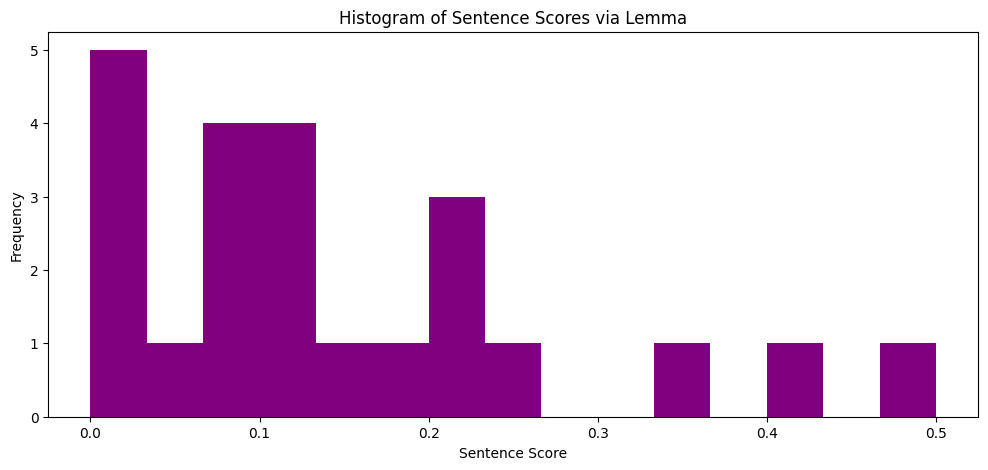

Min: 0.0
Max: 0.5
Number of Scores: 23


In [44]:
def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Get Interesting Lemma Count
    lemmas = [token.lemma_.lower() for token in nlp(sentence) if not token.is_punct and not token.is_stop and not token.is_space]
    interesting_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    score = interesting_count / len(lemmas) if lemmas else 0
    return score

interesting_lemmas = [lemma for lemma, _ in lemma_freq]

# Create List of Lemma Sentence Scores
lemma_sentence_scores = [score_sentence_by_lemma(sentence.text, interesting_tokens) for sentence in doc.sents]

# Histogram of Sentence scores
plt.figure(figsize=(12, 5))
plt.hist(lemma_sentence_scores, bins=15, color='purple')
plt.title('Histogram of Sentence Scores via Lemma')
plt.xlabel('Sentence Score')
plt.ylabel('Frequency')
plt.show()

print(f"Min: {min(lemma_sentence_scores)}")
print(f"Max: {max(lemma_sentence_scores)}")
print(f"Number of Scores: {len(lemma_sentence_scores)}")

## Task 7
7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

## Task 8
8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

## Task 9
9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

## Task 10
10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

## Task 11
11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

## Task 12 
12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

## Task 13
13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

## Convert to HTML

In [ ]:
!jupyter nbconvert --to html article-summarizer.ipynb

[NbConvertApp] Converting notebook article-summarizer.ipynb to html
[NbConvertApp] Writing 306001 bytes to article-summarizer.html
